# SVM Approch

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.svm import SVC


In [ ]:
!ls

## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
filename = 'SVM'#import model approch for  joblib

### PreProcess


#### Clean and Engeering Data

In [3]:
names=['IR', 'MR', 'FF', 'Credibility', 'Competitiveness', 'OR', 'Class']
df = pd.read_csv('../Qualitative_Bankruptcy.data.txt',names=names)

#### Clean and Engeering Data

In [4]:
for col in names:
    print(df[col].value_counts())
    print('\n****\n')

IR
N    89
A    81
P    80
Name: count, dtype: int64

****

MR
N    119
A     69
P     62
Name: count, dtype: int64

****

FF
N    119
A     74
P     57
Name: count, dtype: int64

****

Credibility
N    94
P    79
A    77
Name: count, dtype: int64

****

Competitiveness
N    103
P     91
A     56
Name: count, dtype: int64

****

OR
N    114
P     79
A     57
Name: count, dtype: int64

****

Class
NB    143
B     107
Name: count, dtype: int64

****



In [5]:
X = df.drop(['Class'],axis = 1)
X = pd.get_dummies(data=X, drop_first=True)
y = df['Class'].map({'NB':0,'B':1})

#### Split Data in Train/Test for X and y


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=1099, stratify=y)


### Model

#### Create Model(s)

In [7]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [8]:
svc = SVC()

In [9]:
pipe = Pipeline([('svc',svc)])

In [14]:
#hyperparams Value
kernel = ['linear', 'poly', 'rbf', 'sigmoid', ]
degree = list(range(1,5,1))
gamma = ['scale', 'auto']

In [15]:
hyp_param = {
    'svc__kernel' : kernel,
    'svc__degree' : degree,
    'svc__gamma' : gamma,
}

In [16]:
full_model = GridSearchCV(
    estimator=pipe,
    param_grid=hyp_param,
    cv=5,
    verbose=2    
)

#### Train Model

In [17]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END ..svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END ..svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END ..svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END ..svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END ...svc__degree=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ...svc__degree=1, svc__gamma=scale, sv

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__degree': [1, 2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

### Evaluate model

In [18]:
y_pred = full_model.predict(X_test)

#### Test On data

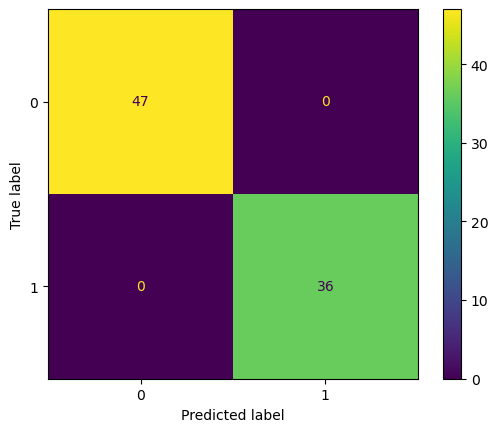

In [19]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

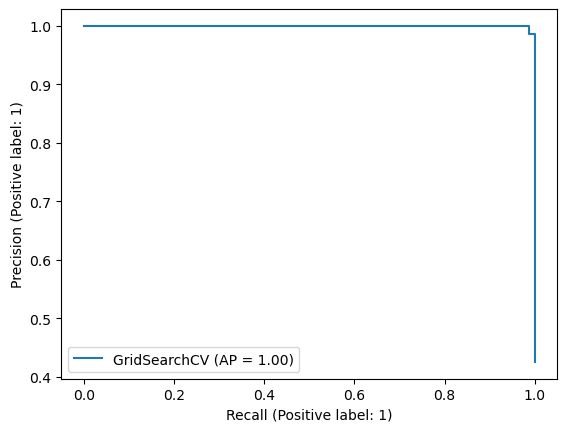

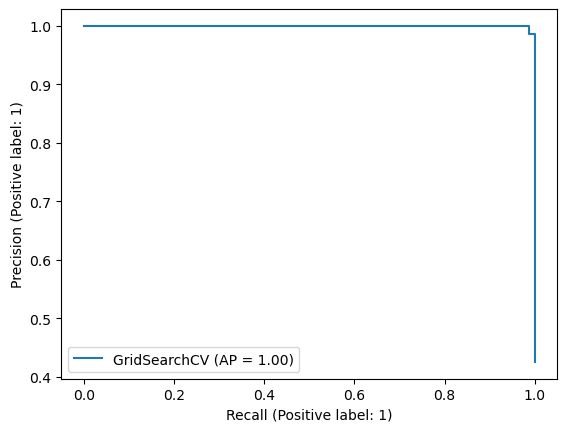

In [20]:
PrecisionRecallDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

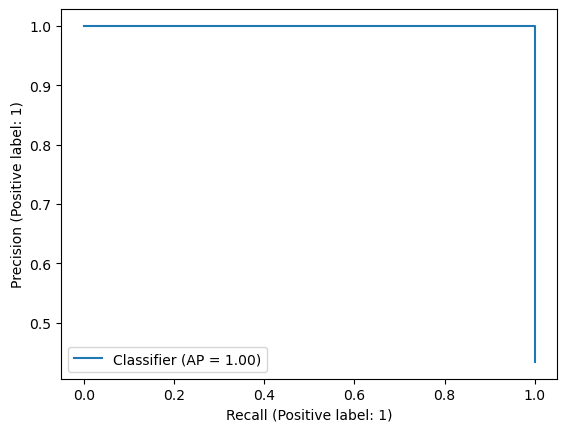

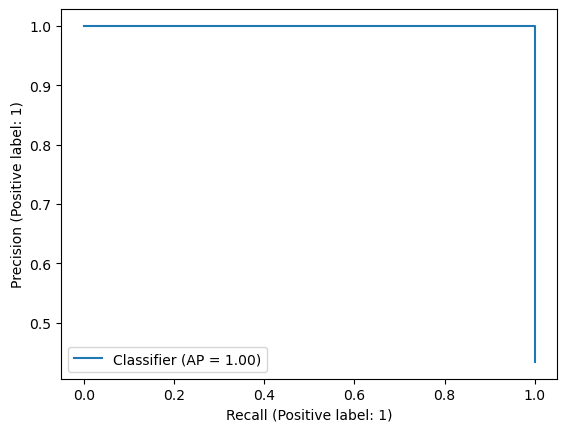

In [22]:

PrecisionRecallDisplay.from_predictions(y_pred=y_pred,
                                    y_true=y_test,).plot()

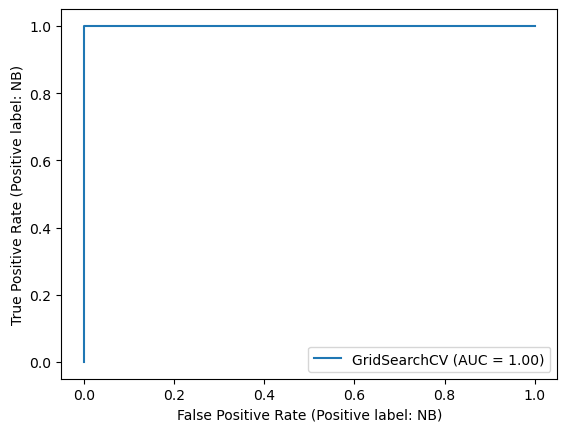

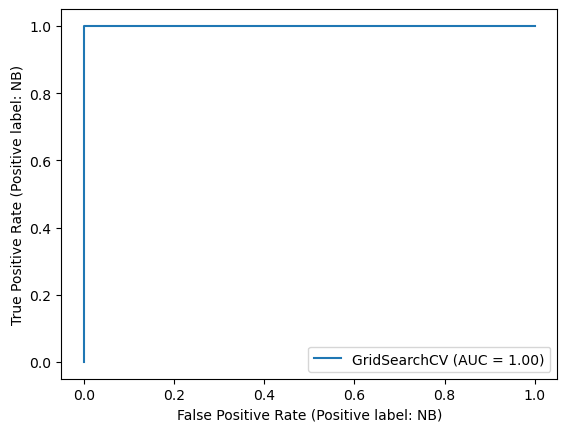

In [30]:
RocCurveDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

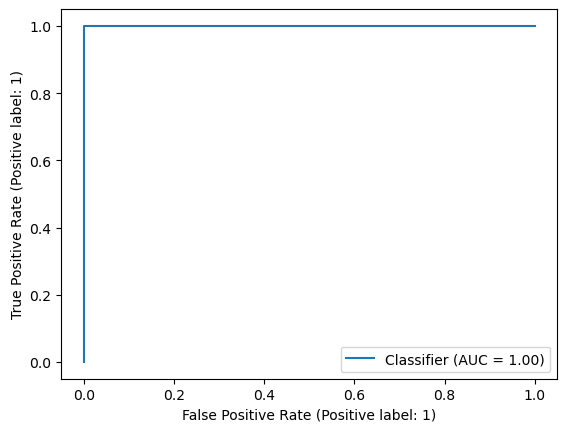

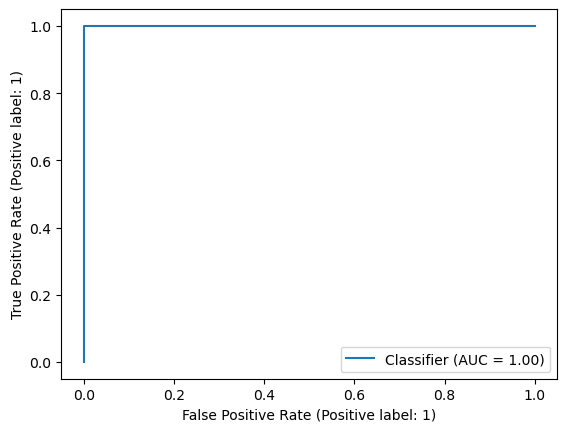

In [23]:
RocCurveDisplay.from_predictions(y_pred=y_pred,
                                 y_true=y_test).plot()

In [24]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        36

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [25]:
full_model.best_params_

{'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}

### Final Model(s)


In [26]:
svc_final = SVC(
    degree=1,
    gamma='scale',
    kernel='sigmoid'
)

#### Train on all Data 

In [27]:
svc_final.fit(X,y)

SVC(degree=1, kernel='sigmoid')

#### Save with joblib

In [28]:
import joblib
joblib.dump(value=svc_final,filename=filename)

['SVM']

# Congratulations!!!

#### Created and trained by  Matin1099.
